# How are in-demand skills trending for Data Analysts?

# Libraries

In [3]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# Loading Dataset

In [4]:
df = pd.read_csv("data_jobs.csv")

## Cleanup

In [5]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

---

## Filtering To Egypt

In [6]:
df_DA_EG = df[(df["job_country"] == "Egypt") & (df["job_title_short"] == "Data Analyst")]
df_DA_EG

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1567,Data Analyst,Data Analyst,Egypt,via Egypt.tanqeeb.com,Full-time,False,Egypt,2023-11-05 13:53:44,True,False,Egypt,NaN,NaN,NaN,Al Asdekaa Group for Dai,[python],{'programming': ['python']}
2997,Data Analyst,Data Analyst,"Giza, El Omraniya, Egypt",via LinkedIn,Full-time,False,Egypt,2023-12-19 13:39:21,False,False,Egypt,NaN,NaN,NaN,Dsquares,"[python, sql, looker, power bi]","{'analyst_tools': ['looker', 'power bi'], 'pro..."
3117,Data Analyst,Digital Marketing Data Analyst,Egypt,via تنقيب مصر,Full-time,False,Egypt,2023-10-18 13:17:08,True,False,Egypt,NaN,NaN,NaN,Rashid Al Jabri Group,"[sas, sas, spss, excel]","{'analyst_tools': ['sas', 'spss', 'excel'], 'p..."
3962,Data Analyst,Data Analyst,Egypt,via LinkedIn,Full-time,False,Egypt,2023-09-09 13:16:11,False,False,Egypt,NaN,NaN,NaN,Elixir Pharma,"[elixir, sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
10424,Data Analyst,Remote Analytics and Financial Operations Manager,"6th of October City, Egypt",via Job Vacancies And Recruitment In Egypt | 3...,Full-time,False,Egypt,2023-02-21 14:03:59,True,False,Egypt,NaN,NaN,NaN,SCOPIC,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777542,Data Analyst,Data Analyst,Egypt,via BeBee,Full-time,False,Egypt,2023-11-30 05:20:31,True,False,Egypt,NaN,NaN,NaN,GfK,"[python, r, excel, ms access]","{'analyst_tools': ['excel', 'ms access'], 'pro..."
779968,Data Analyst,Data Analyst,"Cairo, Egypt",via WUZZUF,Full-time,False,Egypt,2023-12-18 05:18:00,True,False,Egypt,NaN,NaN,NaN,Kashier Payment Solutions,"[sql, python, r, julia, mongodb, mongodb, tabl...","{'analyst_tools': ['tableau'], 'databases': ['..."
784322,Data Analyst,Sql data analyst,Anywhere,via LinkedIn,Full-time,True,Egypt,2023-01-03 06:38:51,True,False,Egypt,NaN,NaN,NaN,بحر العرب لأنظمة المعلومات,"[sql, sql server]","{'databases': ['sql server'], 'programming': [..."
784791,Data Analyst,Data Analyst,Egypt,via Jobs Trabajo.org,Full-time,False,Egypt,2023-11-10 06:42:33,False,False,Egypt,NaN,NaN,NaN,Aramex,"[sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."


## Skill count per month for data analysts

In [7]:
df_DA_EG['job_posted_month_no'] = df_DA_EG['job_posted_date'].dt.month
df_DA_EG_explode = df_DA_EG.explode('job_skills')
df_DA_EG_explode

C:\Users\Makrious\AppData\Local\Temp\ipykernel_10408\2596146472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA_EG['job_posted_month_no'] = df_DA_EG['job_posted_date'].dt.month


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1567,Data Analyst,Data Analyst,Egypt,via Egypt.tanqeeb.com,Full-time,False,Egypt,2023-11-05 13:53:44,True,False,Egypt,NaN,NaN,NaN,Al Asdekaa Group for Dai,python,{'programming': ['python']},11
2997,Data Analyst,Data Analyst,"Giza, El Omraniya, Egypt",via LinkedIn,Full-time,False,Egypt,2023-12-19 13:39:21,False,False,Egypt,NaN,NaN,NaN,Dsquares,python,"{'analyst_tools': ['looker', 'power bi'], 'pro...",12
2997,Data Analyst,Data Analyst,"Giza, El Omraniya, Egypt",via LinkedIn,Full-time,False,Egypt,2023-12-19 13:39:21,False,False,Egypt,NaN,NaN,NaN,Dsquares,sql,"{'analyst_tools': ['looker', 'power bi'], 'pro...",12
2997,Data Analyst,Data Analyst,"Giza, El Omraniya, Egypt",via LinkedIn,Full-time,False,Egypt,2023-12-19 13:39:21,False,False,Egypt,NaN,NaN,NaN,Dsquares,looker,"{'analyst_tools': ['looker', 'power bi'], 'pro...",12
2997,Data Analyst,Data Analyst,"Giza, El Omraniya, Egypt",via LinkedIn,Full-time,False,Egypt,2023-12-19 13:39:21,False,False,Egypt,NaN,NaN,NaN,Dsquares,power bi,"{'analyst_tools': ['looker', 'power bi'], 'pro...",12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784322,Data Analyst,Sql data analyst,Anywhere,via LinkedIn,Full-time,True,Egypt,2023-01-03 06:38:51,True,False,Egypt,NaN,NaN,NaN,بحر العرب لأنظمة المعلومات,sql,"{'databases': ['sql server'], 'programming': [...",1
784322,Data Analyst,Sql data analyst,Anywhere,via LinkedIn,Full-time,True,Egypt,2023-01-03 06:38:51,True,False,Egypt,NaN,NaN,NaN,بحر العرب لأنظمة المعلومات,sql server,"{'databases': ['sql server'], 'programming': [...",1
784791,Data Analyst,Data Analyst,Egypt,via Jobs Trabajo.org,Full-time,False,Egypt,2023-11-10 06:42:33,False,False,Egypt,NaN,NaN,NaN,Aramex,sql,"{'analyst_tools': ['tableau'], 'programming': ...",11
784791,Data Analyst,Data Analyst,Egypt,via Jobs Trabajo.org,Full-time,False,Egypt,2023-11-10 06:42:33,False,False,Egypt,NaN,NaN,NaN,Aramex,tableau,"{'analyst_tools': ['tableau'], 'programming': ...",11


## Pivoting (Grouped by months and skills)

In [8]:
df_DA_EG_pivot = df_DA_EG_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_EG_pivot

job_skills,airflow,alteryx,arch,assembly,atlassian,aws,azure,bigquery,c,c++,...,tableau,tensorflow,terraform,trello,unity,unix,vba,visio,windows,word
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,1,3,0,0,0,...,14,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,2,6,0,0,0,...,7,0,0,0,0,0,3,1,1,5
3,1,1,0,1,0,1,4,0,0,0,...,6,0,1,0,2,0,2,0,0,2
4,0,0,0,0,0,1,1,0,1,1,...,6,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,...,3,0,0,0,0,0,0,0,0,1
6,0,0,1,0,0,0,1,0,0,0,...,5,1,0,0,0,0,1,1,0,2
7,0,2,1,0,0,0,2,0,1,0,...,6,0,0,0,0,0,0,0,0,3
8,0,1,0,0,0,0,1,0,0,0,...,12,0,0,1,0,1,2,0,0,2
9,0,0,1,0,0,1,1,1,2,0,...,12,1,0,0,0,0,0,0,0,3


## Sorts by count

In [9]:
df_DA_EG_pivot.loc['Total'] = df_DA_EG_pivot.sum()
df_DA_EG_pivot = df_DA_EG_pivot[df_DA_EG_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_EG_pivot = df_DA_EG_pivot.drop('Total')

df_DA_EG_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,azure,word,...,ibm cloud,jenkins,pytorch,plotly,spring,splunk,svn,unix,terraform,trello
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,21,17,15,14,11,7,0,2,3,1,...,0,0,0,0,0,0,0,0,0,0
2,14,16,14,7,7,4,6,5,6,5,...,0,0,0,0,0,0,0,0,0,0
3,7,12,8,6,7,3,2,5,4,2,...,1,1,0,0,0,0,0,0,1,0
4,9,3,5,6,1,4,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,4,2,3,3,3,1,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,2,5,3,5,4,2,0,2,1,2,...,0,0,0,0,0,0,0,0,0,0
7,13,13,8,6,9,2,0,2,2,3,...,0,0,0,0,0,0,0,0,0,0
8,25,20,16,12,13,2,4,3,1,2,...,0,0,0,0,0,0,0,1,0,1
9,17,9,16,12,12,5,4,2,1,3,...,0,0,1,0,0,0,0,0,0,0


## Plot the monthly skill count

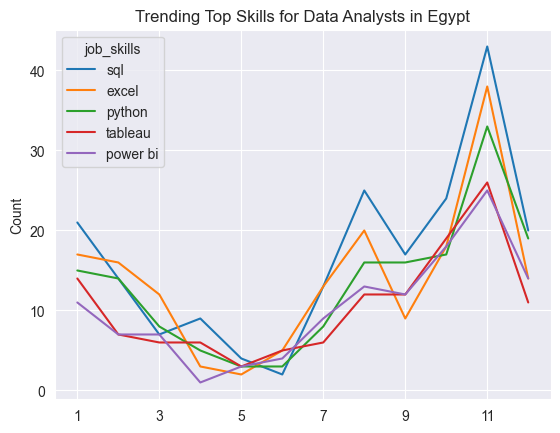

In [10]:
df_DA_EG_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in Egypt')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

---

# Calculate Percentage of Total Jobs

## Get monthly totals

In [11]:
DA_totals = df_DA_EG.groupby('job_posted_month_no').size()
DA_totals

job_posted_month_no
1      42
2      37
3      28
4      18
5      11
6      12
7      28
8      56
9      56
10     76
11    116
12     49
dtype: int64

## Getting Percentage

In [12]:
df_DA_EG_percent = df_DA_EG_pivot.iloc[:12].div(DA_totals/100, axis=0)
df_DA_EG_percent

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,azure,word,...,ibm cloud,jenkins,pytorch,plotly,spring,splunk,svn,unix,terraform,trello
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,50.000000,40.476190,35.714286,33.333333,26.190476,16.666667,0.000000,4.761905,7.142857,2.380952,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,37.837838,43.243243,37.837838,18.918919,18.918919,10.810811,16.216216,13.513514,16.216216,13.513514,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,25.000000,42.857143,28.571429,21.428571,25.000000,10.714286,7.142857,17.857143,14.285714,7.142857,...,3.571429,3.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.571429,0.000000
4,50.000000,16.666667,27.777778,33.333333,5.555556,22.222222,33.333333,0.000000,5.555556,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,36.363636,18.181818,27.272727,27.272727,27.272727,9.090909,18.181818,9.090909,0.000000,9.090909,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,16.666667,41.666667,25.000000,41.666667,33.333333,16.666667,0.000000,16.666667,8.333333,16.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,46.428571,46.428571,28.571429,21.428571,32.142857,7.142857,0.000000,7.142857,7.142857,10.714286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,44.642857,35.714286,28.571429,21.428571,23.214286,3.571429,7.142857,5.357143,1.785714,3.571429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.785714,0.000000,1.785714
9,30.357143,16.071429,28.571429,21.428571,21.428571,8.928571,7.142857,3.571429,1.785714,5.357143,...,0.000000,0.000000,1.785714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Changes month number to month name

In [13]:
df_DA_EG_percent = df_DA_EG_percent.reset_index()
df_DA_EG_percent['job_posted_month'] = df_DA_EG_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_EG_percent = df_DA_EG_percent.set_index('job_posted_month')
df_DA_EG_percent = df_DA_EG_percent.drop(columns='job_posted_month_no')

df_DA_EG_percent

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,azure,word,...,ibm cloud,jenkins,pytorch,plotly,spring,splunk,svn,unix,terraform,trello
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,50.000000,40.476190,35.714286,33.333333,26.190476,16.666667,0.000000,4.761905,7.142857,2.380952,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,37.837838,43.243243,37.837838,18.918919,18.918919,10.810811,16.216216,13.513514,16.216216,13.513514,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,25.000000,42.857143,28.571429,21.428571,25.000000,10.714286,7.142857,17.857143,14.285714,7.142857,...,3.571429,3.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.571429,0.000000
Apr,50.000000,16.666667,27.777778,33.333333,5.555556,22.222222,33.333333,0.000000,5.555556,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,36.363636,18.181818,27.272727,27.272727,27.272727,9.090909,18.181818,9.090909,0.000000,9.090909,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,16.666667,41.666667,25.000000,41.666667,33.333333,16.666667,0.000000,16.666667,8.333333,16.666667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,46.428571,46.428571,28.571429,21.428571,32.142857,7.142857,0.000000,7.142857,7.142857,10.714286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,44.642857,35.714286,28.571429,21.428571,23.214286,3.571429,7.142857,5.357143,1.785714,3.571429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.785714,0.000000,1.785714
Sep,30.357143,16.071429,28.571429,21.428571,21.428571,8.928571,7.142857,3.571429,1.785714,5.357143,...,0.000000,0.000000,1.785714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Plot Monthly Skill Demand

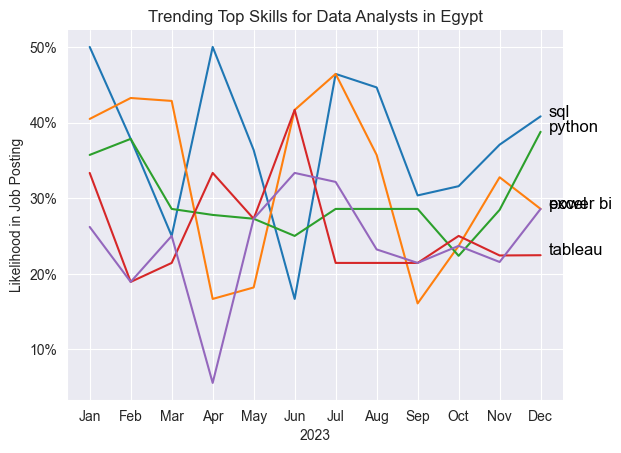

In [14]:
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_EG_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in Egypt')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()